In [148]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import scipy
from math import sqrt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict
#estimators 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
#metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#cross validation 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [115]:
credit = pd.read_csv('default of credit card clients.csv', header=1)
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [9.95567518e-01 4.43248190e-03 3.51008905e-11]
[[ 1.75521866e-03  9.99998460e-01  9.33312578e-08 -1.33496771e-06]
 [-9.99998460e-01  1.75521866e-03 -1.00864371e-06 -4.10403207e-06]
 [-4.12155330e-06  1.34000336e-06  2.05563982e-02  9.99788695e-01]]


In [116]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [117]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [118]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [119]:
credit.drop("ID", axis=1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [120]:
credit.rename(columns={'default payment next month': 'Default'}, inplace = True)

In [121]:
credit ['SEX']= credit ['SEX'] .astype ('str')
credit ['EDUCATION']= credit ['EDUCATION'] .astype ('str')
credit ['MARRIAGE']= credit ['MARRIAGE'] .astype ('str')
credit ['PAY_0']= credit ['PAY_0'] .astype ('str')
credit ['PAY_2']= credit ['PAY_2'] .astype ('str')
credit ['PAY_3']= credit ['PAY_3'] .astype ('str')
credit ['PAY_4']= credit ['PAY_4'] .astype ('str')
credit ['PAY_5']= credit ['PAY_5'] .astype ('str')
credit ['PAY_6']= credit ['PAY_6'] .astype ('str')
credit ['Default']= credit ['Default'] .astype ('str')

In [122]:
#credit ['SEX']= credit ['SEX'].astype('category')
credit ['EDUCATION']= credit ['EDUCATION'].astype('category')
credit ['MARRIAGE']= credit ['MARRIAGE'].astype('category')
credit ['PAY_0']= credit ['PAY_0'].astype('category')
credit ['PAY_2']= credit ['PAY_2'].astype('category')
credit ['PAY_3']= credit ['PAY_3'].astype('category')
credit ['PAY_4']= credit ['PAY_4'].astype('category')

In [152]:
print(credit.groupby('Default').size())

Default
0    23364
1     6636
dtype: int64


In [153]:
covMat = credit.cov()
print(covMat)

                     ID     LIMIT_BAL            AGE     BILL_AMT1  \
ID         7.500250e+07  2.941664e+07    1491.057019  1.236447e+07   
LIMIT_BAL  2.941664e+07  1.683446e+10  173076.722569  2.727020e+09   
AGE        1.491057e+03  1.730767e+05      84.969755  3.817293e+04   
BILL_AMT1  1.236447e+07  2.727020e+09   38172.933546  5.422240e+09   
BILL_AMT2  1.108392e+07  2.570130e+09   35613.657962  4.986670e+09   
BILL_AMT3  1.462688e+07  2.548533e+09   34334.251320  4.556511e+09   
BILL_AMT4  2.248126e+07  2.453926e+09   30453.108180  4.075286e+09   
BILL_AMT5  8.795803e+06  2.331481e+09   27654.067800  3.714795e+09   
BILL_AMT6  8.628506e+06  2.243837e+09   26137.648547  3.519876e+09   
PAY_AMT1   1.397501e+06  4.195711e+08    3992.041735  1.710894e+08   
PAY_AMT2   1.677383e+06  5.333504e+08    4626.861549  1.685692e+08   
PAY_AMT3   5.969803e+06  4.801180e+08    4746.824393  2.034048e+08   
PAY_AMT4   1.057334e+06  4.131202e+08    3087.324192  1.826164e+08   
PAY_AMT5   8.629502e

In [154]:
#Split date 80-20
array = credit.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [155]:
X_train.shape, Y_validation.shape

((24000, 4), (6000,))

In [156]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.556539 (0.015074)
LDA: 0.587413 (0.010093)
KNN: 0.543580 (0.010748)
CART: 0.555080 (0.008586)
NB: 0.544454 (0.012337)
SVM: 0.533250 (0.004602)


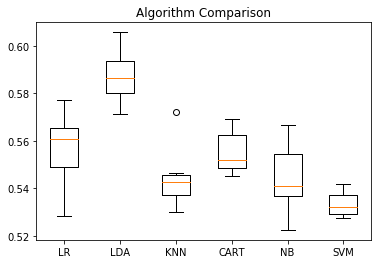

In [157]:

# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()


In [158]:
#Predictions on validation LR
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [159]:
# Evaluattion LR
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.5548333333333333
[[   0    4    6    0]
 [   0 1036 1706    0]
 [   0  885 2293    0]
 [   0   21   49    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.53      0.38      0.44      2742
           2       0.57      0.72      0.63      3178
           3       0.00      0.00      0.00        70

    accuracy                           0.55      6000
   macro avg       0.27      0.27      0.27      6000
weighted avg       0.54      0.55      0.54      6000



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [160]:
#Predictions on validation LDA
model =  LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [161]:
# Evaluattion LDA
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.5853333333333334
[[   0    6    4    0]
 [   0 1146 1596    0]
 [   0  812 2366    0]
 [   0   24   46    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.58      0.42      0.48      2742
           2       0.59      0.74      0.66      3178
           3       0.00      0.00      0.00        70

    accuracy                           0.59      6000
   macro avg       0.29      0.29      0.29      6000
weighted avg       0.58      0.59      0.57      6000



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [162]:
#Predictions on validation CART
model =  DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [163]:
# Evaluattion CART
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.5636666666666666
[[   0    5    5    0]
 [   3 1480 1230   29]
 [   5 1249 1902   22]
 [   0   38   32    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.53      0.54      0.54      2742
           2       0.60      0.60      0.60      3178
           3       0.00      0.00      0.00        70

    accuracy                           0.56      6000
   macro avg       0.28      0.28      0.28      6000
weighted avg       0.56      0.56      0.56      6000

